In [110]:
import os
import numpy as np

def parse_action_file(filepath):
    """
    Parses a given action file and extracts the (100,3) array.
    """
    action_values = []
    with open(filepath, 'r') as file:
        for line in file:
            if line.strip():  # Skip empty lines
                parts = line.split(':')
                if len(parts) > 1:
                    values = parts[1].strip()[1:-1].split(', ')
                    action_values.append([float(v) for v in values])
            if len(action_values) == 200:  # Stop after 100 entries
                break
    return np.array(action_values)

def parse_latent_file(filepath):
    """
    Parses the latent_sample.txt file and extracts latent_z values for each action_seed.
    """
    latent_dict = {}
    with open(filepath, 'r') as file:
        current_seed = None
        for line in file:
            if line.startswith("action_seed:"):
                current_seed = int(line.strip().split(':')[1])
            elif current_seed is not None:
                # Parse latent_z values
                latent_z = [float(v) for v in line.strip().split()]
                # print(latent_z)
                latent_dict[current_seed] = np.array(latent_z).reshape(1, -1)
                print(latent_dict)
    return latent_dict

def parse_latent_file(filepath):
    """
    Parses the latent_sample.txt file and extracts latent_z values for each action_seed.
    """
    latent_dict = {}
    with open(filepath, 'r') as file:
        current_seed = None
        for line in file:
            if line.startswith("action_seed:"):
                current_seed = int(line.strip().split(':')[1])
            elif current_seed is not None:
                if current_seed in latent_dict:
                    # Skip if the key already exists
                    continue
                # Parse latent_z values
                latent_z = [float(v) for v in line.strip().split()]
                latent_dict[current_seed] = np.array(latent_z).reshape(1, -1)
    return latent_dict

def create_action_latent_dicts(action_dir, latent_file):
    """
    Combines action values and latent_z values into dictionaries for all action files.
    """
    # Parse latent file
    latent_data = parse_latent_file(latent_file)

    # Create the list of dictionaries
    result = []
    for i in range(500 ,524):  # Iterate through action16.txt to action216.txt
        action_file = os.path.join(action_dir, f"actions{i}.txt")
        if os.path.exists(action_file):
            action_values = parse_action_file(action_file)
            latent_z = latent_data.get(i, np.zeros((1, 32)))  # Default to zero array if not found
            # print(latent_z)
            result.append({
                f"action_value{i}": action_values,
                f"latent_z{i}": latent_z
            })
    return result

# Main execution
if __name__ == "__main__":
    action_directory = "/home/shuntaroitakuralab/tmc_wrs_docker/act/action_gen/"
    latent_sample_file = os.path.join(action_directory, "latent_samples.txt")

    # Generate the array of dictionaries
    action_latent_dicts = create_action_latent_dicts(action_directory, latent_sample_file)

    # Example: Print the first dictionary
    print(action_latent_dicts)


[{'action_value500': array([[-4.97900844e-02, -4.97952998e-01, -1.40514791e-01],
       [-4.99792695e-02, -4.66660619e-01, -1.10776246e-01],
       [-2.01783180e-02, -4.55545187e-01, -7.52517581e-02],
       [-1.47221684e-02, -4.11279380e-01, -5.99775910e-02],
       [ 1.93411112e-02, -3.51628721e-01, -2.99498439e-02],
       [ 2.29252577e-02, -3.52001905e-01,  6.26635551e-03],
       [ 4.01784778e-02, -2.67857999e-01,  4.86317277e-02],
       [ 5.73920012e-02, -2.02489108e-01,  1.20054662e-01],
       [ 5.44471741e-02, -1.61032006e-01,  1.58097208e-01],
       [ 8.26942921e-02, -9.51219946e-02,  2.32522249e-01],
       [ 2.08567977e-02,  2.51734257e-03,  2.94575632e-01],
       [ 2.62715220e-02,  5.77771068e-02,  3.61653447e-01],
       [ 5.78913093e-02,  1.55934274e-01,  4.86444384e-01],
       [ 2.05335021e-02,  2.42221981e-01,  5.90921700e-01],
       [ 7.33552575e-02,  3.65863651e-01,  7.49428689e-01],
       [ 7.25600123e-02,  4.68467265e-01,  8.00565958e-01],
       [ 1.87870711

In [111]:
print(action_latent_dicts)

[{'action_value500': array([[-4.97900844e-02, -4.97952998e-01, -1.40514791e-01],
       [-4.99792695e-02, -4.66660619e-01, -1.10776246e-01],
       [-2.01783180e-02, -4.55545187e-01, -7.52517581e-02],
       [-1.47221684e-02, -4.11279380e-01, -5.99775910e-02],
       [ 1.93411112e-02, -3.51628721e-01, -2.99498439e-02],
       [ 2.29252577e-02, -3.52001905e-01,  6.26635551e-03],
       [ 4.01784778e-02, -2.67857999e-01,  4.86317277e-02],
       [ 5.73920012e-02, -2.02489108e-01,  1.20054662e-01],
       [ 5.44471741e-02, -1.61032006e-01,  1.58097208e-01],
       [ 8.26942921e-02, -9.51219946e-02,  2.32522249e-01],
       [ 2.08567977e-02,  2.51734257e-03,  2.94575632e-01],
       [ 2.62715220e-02,  5.77771068e-02,  3.61653447e-01],
       [ 5.78913093e-02,  1.55934274e-01,  4.86444384e-01],
       [ 2.05335021e-02,  2.42221981e-01,  5.90921700e-01],
       [ 7.33552575e-02,  3.65863651e-01,  7.49428689e-01],
       [ 7.25600123e-02,  4.68467265e-01,  8.00565958e-01],
       [ 1.87870711

In [112]:

import numpy as np

data = action_latent_dicts  # あなたのデータをここに挿入してください
start_num = 500


# ラベル付け処理
for i, entry in enumerate(data):
    action_key = f"action_value{start_num + i}"
    label_key = f"custom_label{start_num + i}"

    # action_valueの (100,3) 配列を取得
    action_value = entry[action_key]

    first_dimension = action_value[:,0]
    second_dimension = action_value[:,1]
    third_dimension = action_value[:, 2]

    if (third_dimension >= 0.5).any() :
        label = 1
    else:
        label = 0
    

    # ラベルを辞書に追加
    entry[label_key] = label

# 結果を確認
for i, entry in enumerate(data):
    action_key = f"action_value{start_num + i}"
    label_key = f"custom_label{start_num + i}"
    print(f"{action_key}: Label {entry[label_key]}")


action_value500: Label 1
action_value501: Label 1
action_value502: Label 0
action_value503: Label 1
action_value504: Label 1
action_value505: Label 1
action_value506: Label 1
action_value507: Label 1
action_value508: Label 1
action_value509: Label 1
action_value510: Label 1
action_value511: Label 1
action_value512: Label 1
action_value513: Label 1
action_value514: Label 1
action_value515: Label 1
action_value516: Label 0
action_value517: Label 1
action_value518: Label 1
action_value519: Label 1
action_value520: Label 1
action_value521: Label 1
action_value522: Label 1
action_value523: Label 1


PCA 寄与率: [0.13062279 0.10494362]


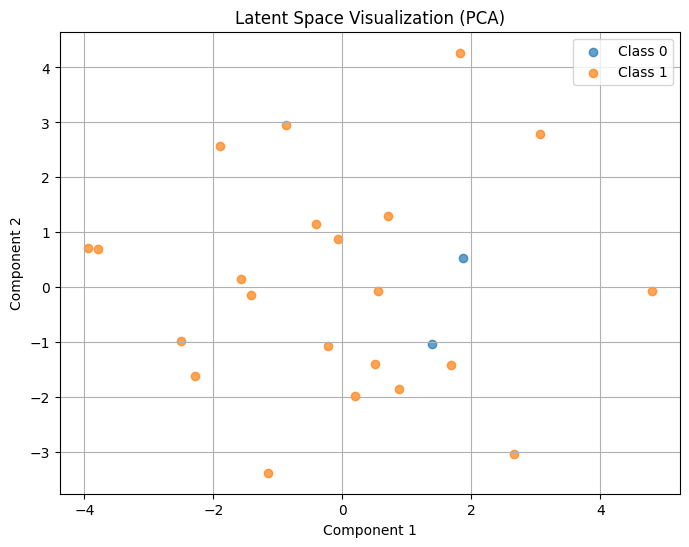

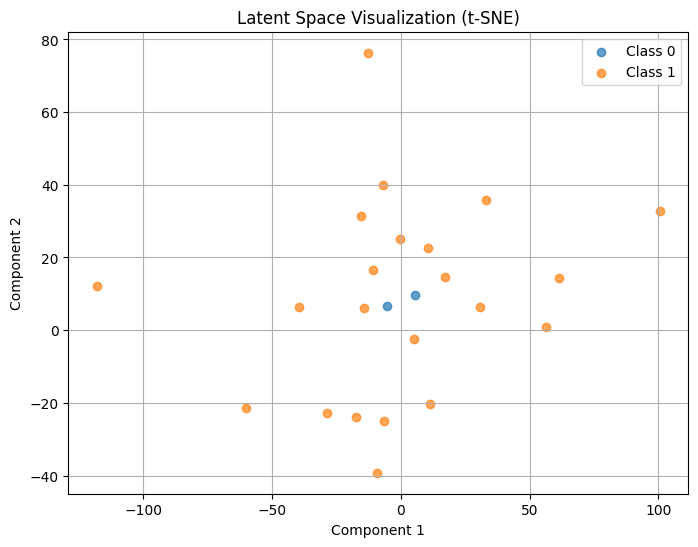

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ラベル付け済みのデータを使用
data = action_latent_dicts  # あなたのデータをここに挿入してください
start_num = 500

# latent_zの値を収集して (200, 32) 配列を作成
latent_z_values = np.array([entry[f'latent_z{start_num + i}'].flatten() for i, entry in enumerate(data)])

# クラスラベルの取得
labels = np.array([entry[f'custom_label{start_num + i}'] for i, entry in enumerate(data)])

# PCAによる次元圧縮
pca = PCA(n_components=2)
latent_z_pca = pca.fit_transform(latent_z_values)

# PCAの寄与率を取得
explained_variance_ratio = pca.explained_variance_ratio_
print(f"PCA 寄与率: {explained_variance_ratio}")

# t-SNEによる次元圧縮
tsne = TSNE(n_components=2, random_state=0, perplexity=20)
latent_z_tsne = tsne.fit_transform(latent_z_values)

# プロット関数
def plot_2d(data, labels, title, method_name):
    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        indices = labels == label
        plt.scatter(data[indices, 0], data[indices, 1], label=f'Class {label}', alpha=0.7)
    plt.title(f"{title} ({method_name})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid()
    plt.show()

# PCAのプロット
plot_2d(latent_z_pca, labels, "Latent Space Visualization", "PCA")

# t-SNEのプロット
plot_2d(latent_z_tsne, labels, "Latent Space Visualization", "t-SNE")


平均が 0.5 より大きい次元: [ 3 10 16 19]


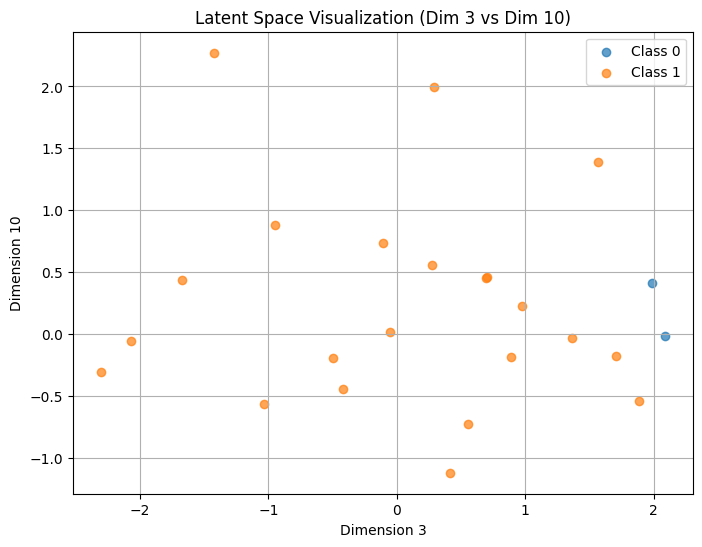

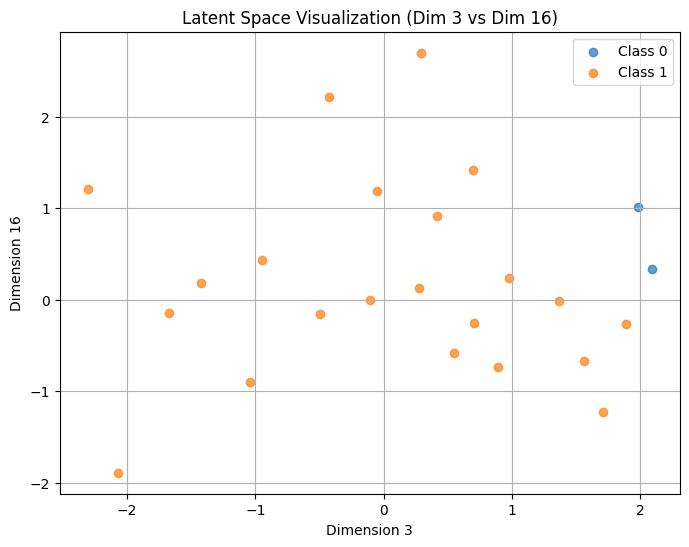

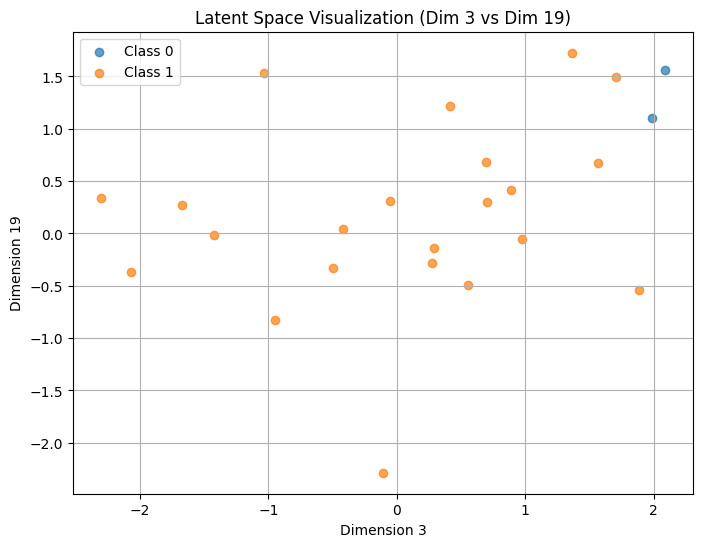

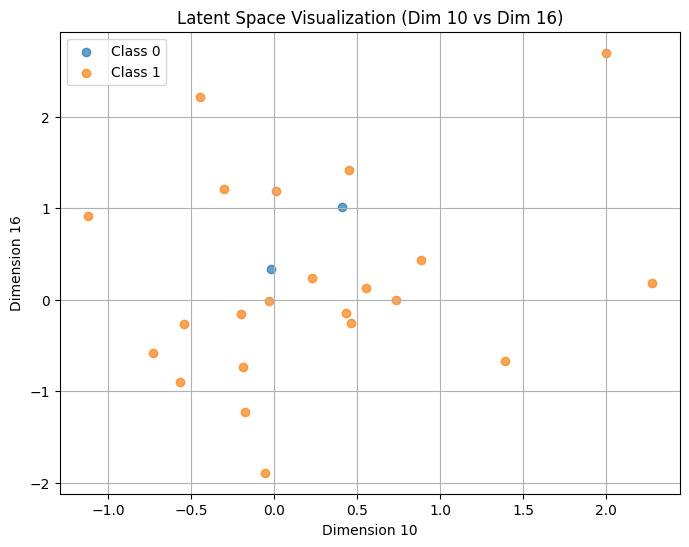

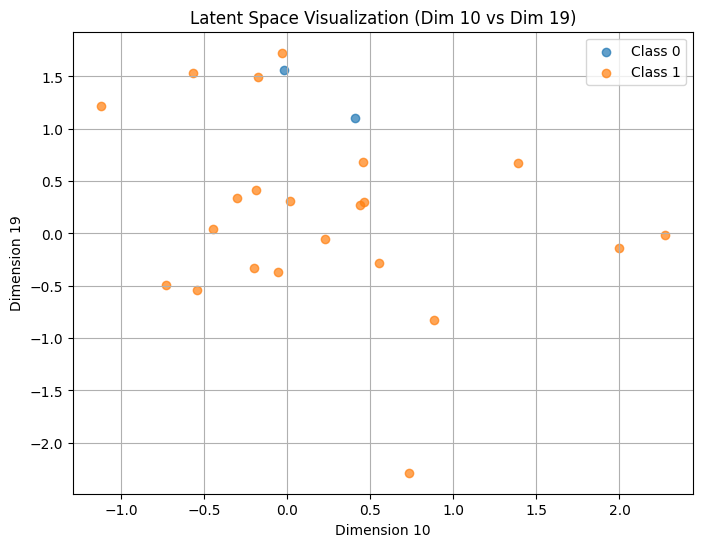

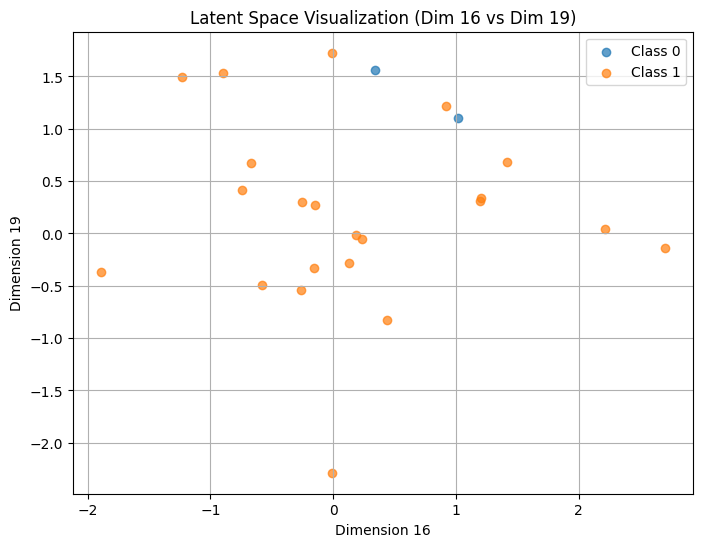

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# ラベル付け済みのデータを使用
data = action_latent_dicts  # あなたのデータをここに挿入してください
start_num = 500

# latent_zの値を収集して (200, 32) 配列を作成
latent_z_values = np.array([entry[f'latent_z{start_num + i}'].flatten() for i, entry in enumerate(data)])

# クラスラベルの取得
labels = np.array([entry[f'custom_label{start_num + i}'] for i, entry in enumerate(data)])

# 各次元の平均を計算
dimension_means = np.mean(latent_z_values, axis=0)

# 平均が 0.5 より大きい次元を取得
selected_dimensions = np.where(dimension_means > 0.2)[0]

# 結果の表示
print(f"平均が 0.5 より大きい次元: {selected_dimensions}")

# プロット関数
def plot_selected_dimensions(latent_z_values, labels, selected_dimensions):
    """
    指定した次元を軸にプロットする関数。
    複数の次元が指定された場合、全組み合わせでプロット。
    """
    num_dimensions = len(selected_dimensions)
    
    if num_dimensions < 2:
        print("プロットするには少なくとも2つの次元が必要です。")
        return
    
    # 全組み合わせでプロット
    for i in range(num_dimensions):
        for j in range(i + 1, num_dimensions):
            dim_x, dim_y = selected_dimensions[i], selected_dimensions[j]
            
            # プロット
            plt.figure(figsize=(8, 6))
            for label in np.unique(labels):
                indices = labels == label
                plt.scatter(
                    latent_z_values[indices, dim_x], 
                    latent_z_values[indices, dim_y], 
                    label=f'Class {label}', alpha=0.7
                )
            plt.title(f"Latent Space Visualization (Dim {dim_x} vs Dim {dim_y})")
            plt.xlabel(f"Dimension {dim_x}")
            plt.ylabel(f"Dimension {dim_y}")
            plt.legend()
            plt.grid()
            plt.show()

# プロット実行
plot_selected_dimensions(latent_z_values, labels, selected_dimensions)
